# VNA measurements of lines.
https://github.com/QCoDeS/Qcodes/blob/master/docs/examples/driver_examples/Qcodes%20example%20with%20Rohde%20Schwarz%20ZNB.ipynb 

In [1]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import qcodes as qc

#import instrument
import qcodes.instrument_drivers.rohde_schwarz.ZNB as ZNB

In [2]:
vna = ZNB.ZNB('VNA', 'USB0::0x0AAD::0x01A1::101879::INSTR')

Connected to: Rohde-Schwarz ZNB20-2Port (serial:1311601062101879, firmware:2.86) in 0.83s


To use the VNA we likely want to turn on RF Power, which is off by default for safty in this driver. The driver default to low power but for safety lets set it to -50 dBm. The rf can be turned on and off globally and the power adjusted individually for each channel

In [4]:
vna.channels.power(-50)
vna.rf_on()
vna.channels.autoscale()

d:\onedrive\bf3\code\qcodes\qcodes\instrument\parameter.py:1218: UserWarning: MultiParameters do not support set at this time.
  warnings.warn('MultiParameters do not support set at this time.')


In [3]:
station = qc.Station(vna)

In [5]:
#initialize database
import datetime
dataset_name = 'VNA_linecheck'
qc.config["core"]["db_location"] = datetime.date.today().strftime(r'D:\OneDrive\BF3\Data\%Y%m%d_'+dataset_name+'.db')
# automatically uses a different DB file for each month
qc.dataset.database.initialise_database()
qc.config.core.db_location

Upgrading database: : 0it [00:00, ?it/s]


'D:\\OneDrive\\BF3\\Data\\20190208_VNA_linecheck.db'

In [6]:
exp = qc.new_experiment("VNA analysis", sample_name="lines")

DataSet:
   location = 'data/2019-02-08/#011_{name}_10-23-49'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Measured | VNA_S12_trace | trace        | (1000,)
acquired at 2019-02-08 10:23:51


<IPython.core.display.Javascript object>


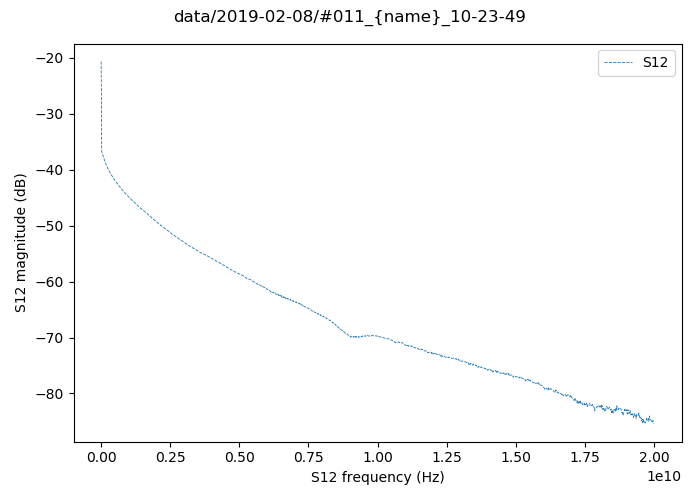

In [17]:
#line 4-23
vna.rf_on()
vna.channels.S21.npts(1000)
vna.channels.S12.npts(1000)
vna.channels.S12.power(10)
vna.channels.S21.power(-30)
#data_S21 = qc.Measure(vna.channels.S21.trace).run()
data_S12 = qc.Measure(vna.channels.S12.trace).run()
plot = qc.MatPlot(figsize=(7,5))
#plot.add(data_S21.VNA_S21_trace, subplot=1, label='S21')
plot.add(data_S12.VNA_S12_trace,fmt='--',linewidth=0.6,subplot=1, label='S12')
plt.legend()
plot.tight_layout()
    

DataSet:
   location = 'data/2019-02-08/#012_{name}_10-33-24'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Measured | VNA_S12_trace | trace        | (1000,)
acquired at 2019-02-08 10:33:26


<IPython.core.display.Javascript object>


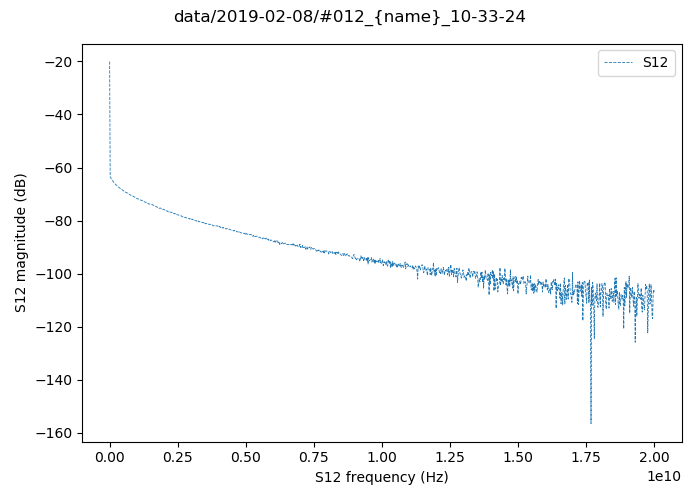

In [18]:
#line 4-17
vna.rf_on()
vna.channels.S21.npts(1000)
vna.channels.S12.npts(1000)
vna.channels.S12.power(10)
vna.channels.S21.power(-30)
#data_S21 = qc.Measure(vna.channels.S21.trace).run()
data_S12 = qc.Measure(vna.channels.S12.trace).run()
plot = qc.MatPlot(figsize=(7,5))
#plot.add(data_S21.VNA_S21_trace, subplot=1, label='S21')
plot.add(data_S12.VNA_S12_trace,fmt='--',linewidth=0.6,subplot=1, label='S12')
plt.legend()
plot.tight_layout()


DataSet:
   location = 'data/2019-02-08/#022_{name}_11-36-33'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Measured | VNA_S12_trace | trace        | (1000,)
acquired at 2019-02-08 11:36:34


<IPython.core.display.Javascript object>


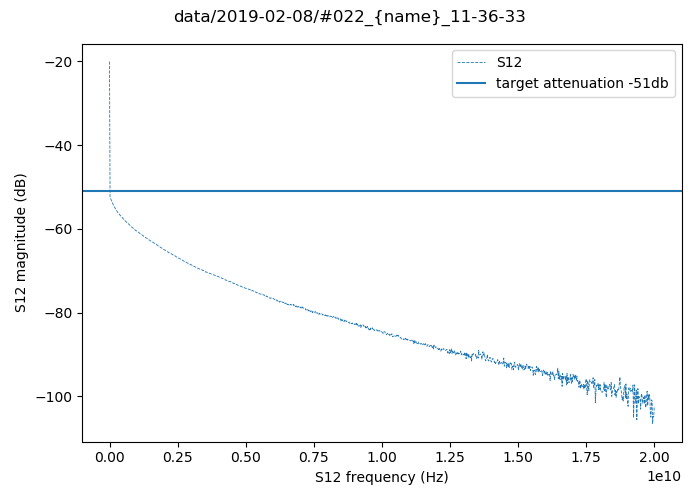

In [28]:
#line 4-5
vna.rf_on()
vna.channels.S21.npts(1000)
vna.channels.S12.npts(1000)
vna.channels.S12.power(10)
vna.channels.S21.power(-30)
#data_S21 = qc.Measure(vna.channels.S21.trace).run()
data_S12 = qc.Measure(vna.channels.S12.trace).run()
plot = qc.MatPlot(figsize=(7,5))
#plot.add(data_S21.VNA_S21_trace, subplot=1, label='S21')
plot.add(data_S12.VNA_S12_trace,fmt='--',linewidth=0.6,subplot=1, label='S12')
plt.axhline(-51, label='target attenuation -51db')
plt.legend()
plot.tight_layout()


DataSet:
   location = 'data/2019-02-08/#028_{name}_11-49-18'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Measured | VNA_S12_trace | trace        | (1000,)
acquired at 2019-02-08 11:49:19


<IPython.core.display.Javascript object>


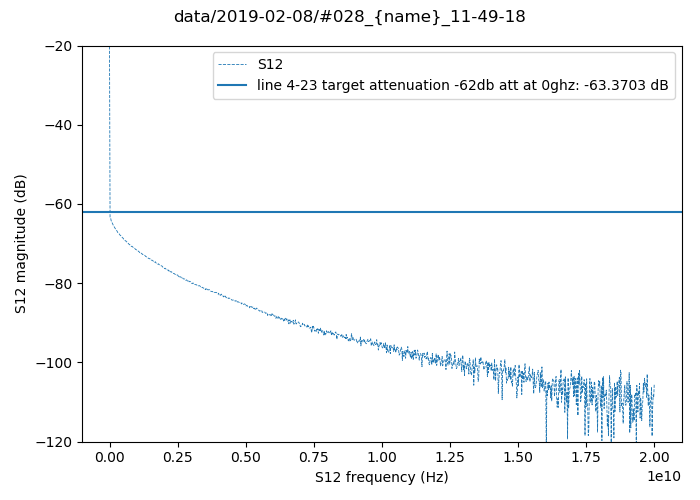

In [38]:
#line 4-23
vna.rf_on()
vna.channels.S21.npts(1000)
vna.channels.S12.npts(1000)
vna.channels.S12.power(10)
vna.channels.S21.power(-30)
#data_S21 = qc.Measure(vna.channels.S21.trace).run()
data_S12 = qc.Measure(vna.channels.S12.trace).run()
plot = qc.MatPlot(figsize=(7,5))
#plot.add(data_S21.VNA_S21_trace, subplot=1, label='S21')
plot.add(data_S12.VNA_S12_trace,fmt='--',linewidth=0.6,subplot=1, label='S12')
plt.axhline(-62, label='line 4-23 target attenuation -62db att at 0ghz: %.4f dB' % data_S12.VNA_S12_trace[1])
plt.ylim(-120,-20)
plt.legend()
plot.tight_layout()


DataSet:
   location = 'data/2019-02-08/#032_{name}_14-04-01'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Measured | VNA_S12_trace | trace        | (1000,)
acquired at 2019-02-08 14:04:02


<IPython.core.display.Javascript object>


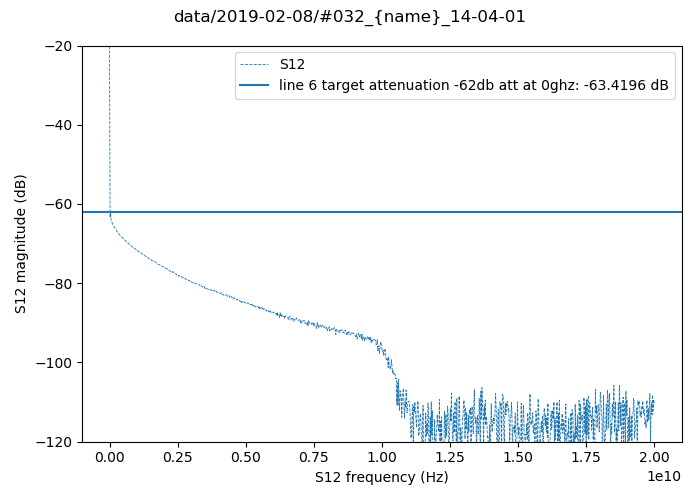

In [43]:
#line 6
vna.rf_on()
vna.channels.S21.npts(1000)
vna.channels.S12.npts(1000)
vna.channels.S12.power(10)
vna.channels.S21.power(-30)
#data_S21 = qc.Measure(vna.channels.S21.trace).run()
data_S12 = qc.Measure(vna.channels.S12.trace).run()
plot = qc.MatPlot(figsize=(7,5))
#plot.add(data_S21.VNA_S21_trace, subplot=1, label='S21')
plot.add(data_S12.VNA_S12_trace,fmt='--',linewidth=0.6,subplot=1, label='S12')
plt.axhline(-62, label='line 6 target attenuation -62db att at 0ghz: %.4f dB' % data_S12.VNA_S12_trace[1])
plt.ylim(-120,-20)
plt.legend()
plot.tight_layout()


DataSet:
   location = 'data/2019-02-08/#034_{name}_14-20-39'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Measured | VNA_S12_trace | trace        | (1000,)
acquired at 2019-02-08 14:20:41


<IPython.core.display.Javascript object>


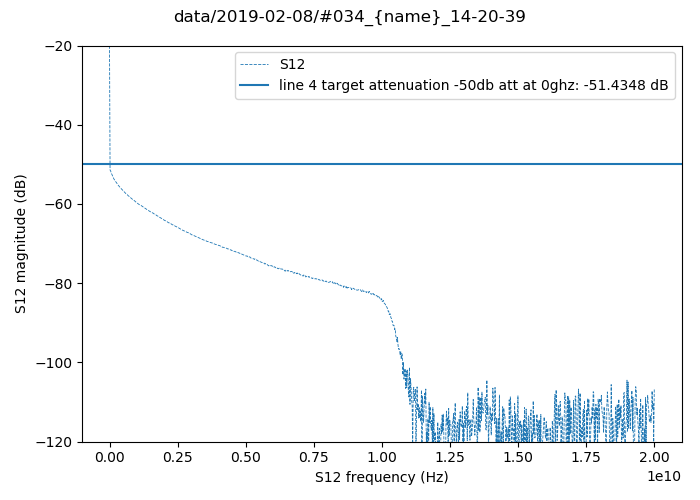

In [45]:
#line 4
vna.rf_on()
vna.channels.S21.npts(1000)
vna.channels.S12.npts(1000)
vna.channels.S12.power(10)
vna.channels.S21.power(-30)
#data_S21 = qc.Measure(vna.channels.S21.trace).run()
data_S12 = qc.Measure(vna.channels.S12.trace).run()
plot = qc.MatPlot(figsize=(7,5))
#plot.add(data_S21.VNA_S21_trace, subplot=1, label='S21')
plot.add(data_S12.VNA_S12_trace,fmt='--',linewidth=0.6,subplot=1, label='S12')
plt.axhline(-50, label='line 4 target attenuation -50db att at 0ghz: %.4f dB' % data_S12.VNA_S12_trace[1])
plt.ylim(-120,-20)
plt.legend()
plot.tight_layout()

DataSet:
   location = 'data/2019-02-08/#036_{name}_14-43-20'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Measured | VNA_S12_trace | trace        | (1000,)
acquired at 2019-02-08 14:43:22


<IPython.core.display.Javascript object>


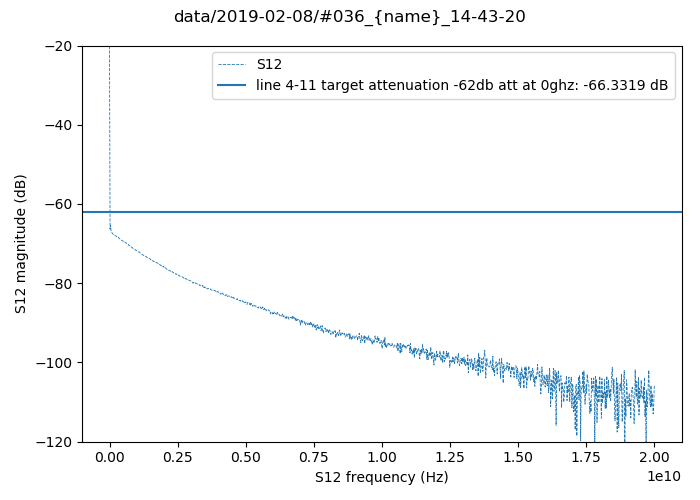

In [47]:
#line 4-11
vna.rf_on()
vna.channels.S21.npts(1000)
vna.channels.S12.npts(1000)
vna.channels.S12.power(10)
vna.channels.S21.power(-30)
#data_S21 = qc.Measure(vna.channels.S21.trace).run()
data_S12 = qc.Measure(vna.channels.S12.trace).run()
plot = qc.MatPlot(figsize=(7,5))
#plot.add(data_S21.VNA_S21_trace, subplot=1, label='S21')
plot.add(data_S12.VNA_S12_trace,fmt='--',linewidth=0.6,subplot=1, label='S12')
plt.axhline(-62, label='line 4-11 target attenuation -62db att at 0ghz: %.4f dB' % data_S12.VNA_S12_trace[1])
plt.ylim(-120,-20)
plt.legend()
plot.tight_layout()

DataSet:
   location = 'data/2019-02-08/#039_{name}_15-14-30'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Measured | VNA_S12_trace | trace        | (1000,)
acquired at 2019-02-08 15:14:32


<IPython.core.display.Javascript object>


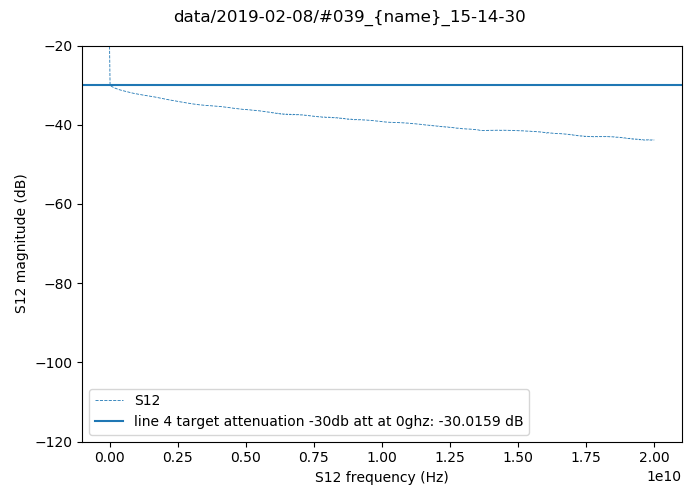

In [50]:
#line 4
vna.rf_on()
vna.channels.S21.npts(1000)
vna.channels.S12.npts(1000)
vna.channels.S12.power(10)
vna.channels.S21.power(-30)
#data_S21 = qc.Measure(vna.channels.S21.trace).run()
data_S12 = qc.Measure(vna.channels.S12.trace).run()
plot = qc.MatPlot(figsize=(7,5))
#plot.add(data_S21.VNA_S21_trace, subplot=1, label='S21')
plot.add(data_S12.VNA_S12_trace,fmt='--',linewidth=0.6,subplot=1, label='S12')
plt.axhline(-30, label='line 4 target attenuation -30db att at 0ghz: %.4f dB' % data_S12.VNA_S12_trace[1])
plt.ylim(-120,-20)
plt.legend()
plot.tight_layout()

DataSet:
   location = 'data/2019-02-08/#040_{name}_15-25-54'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Measured | VNA_S12_trace | trace        | (1000,)
acquired at 2019-02-08 15:25:56


<IPython.core.display.Javascript object>


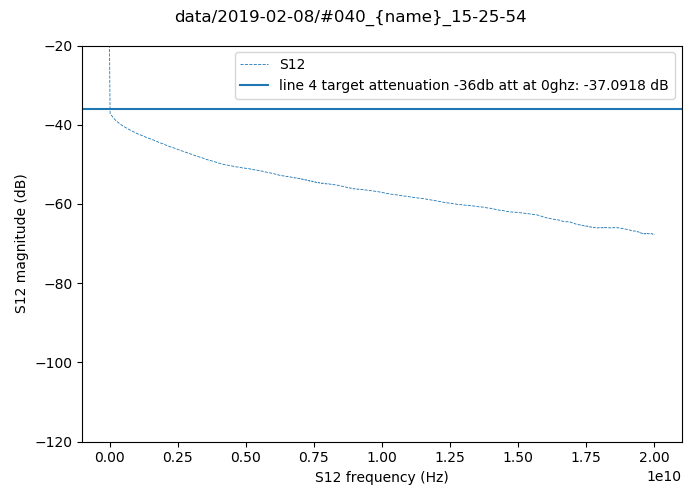

In [51]:
#line 4
vna.rf_on()
vna.channels.S21.npts(1000)
vna.channels.S12.npts(1000)
vna.channels.S12.power(10)
vna.channels.S21.power(-30)
#data_S21 = qc.Measure(vna.channels.S21.trace).run()
data_S12 = qc.Measure(vna.channels.S12.trace).run()
plot = qc.MatPlot(figsize=(7,5))
#plot.add(data_S21.VNA_S21_trace, subplot=1, label='S21')
plot.add(data_S12.VNA_S12_trace,fmt='--',linewidth=0.6,subplot=1, label='S12')
plt.axhline(-36, label='line 4 target attenuation -36db att at 0ghz: %.4f dB' % data_S12.VNA_S12_trace[1])
plt.ylim(-120,-20)
plt.legend()
plot.tight_layout()

DataSet:
   location = 'data/2019-02-08/#042_{name}_15-48-43'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Measured | VNA_S12_trace | trace        | (1000,)
acquired at 2019-02-08 15:48:45


<IPython.core.display.Javascript object>


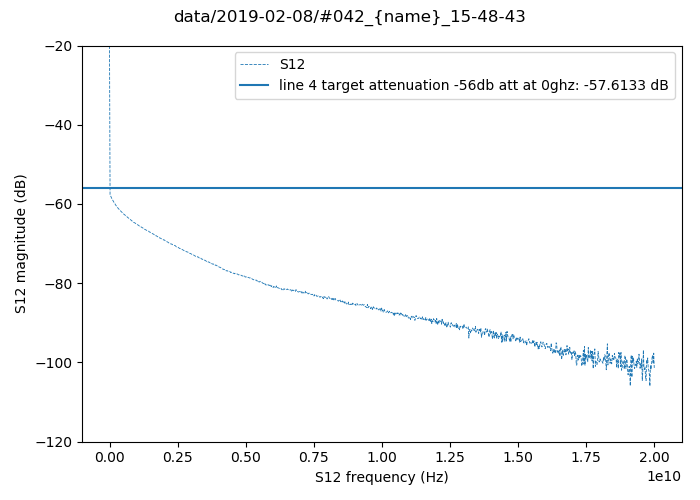

In [53]:
#line 4
vna.rf_on()
vna.channels.S21.npts(1000)
vna.channels.S12.npts(1000)
vna.channels.S12.power(10)
vna.channels.S21.power(-30)
#data_S21 = qc.Measure(vna.channels.S21.trace).run()
data_S12 = qc.Measure(vna.channels.S12.trace).run()
plot = qc.MatPlot(figsize=(7,5))
#plot.add(data_S21.VNA_S21_trace, subplot=1, label='S21')
plot.add(data_S12.VNA_S12_trace,fmt='--',linewidth=0.6,subplot=1, label='S12')
plt.axhline(-56, label='line 4 target attenuation -56db att at 0ghz: %.4f dB' % data_S12.VNA_S12_trace[1])
plt.ylim(-120,-20)
plt.legend()
plot.tight_layout()

DataSet:
   location = 'data/2019-02-08/#043_{name}_15-59-49'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Measured | VNA_S12_trace | trace        | (1000,)
acquired at 2019-02-08 15:59:51


<IPython.core.display.Javascript object>


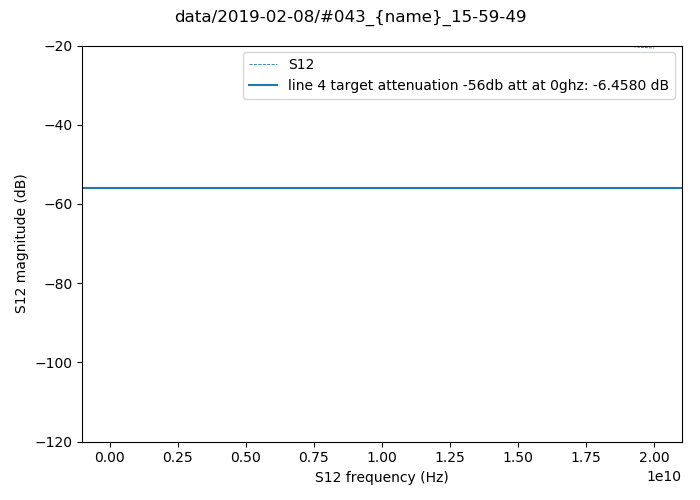

In [54]:
#line 4
vna.rf_on()
vna.channels.S21.npts(1000)
vna.channels.S12.npts(1000)
vna.channels.S12.power(10)
vna.channels.S21.power(-30)
#data_S21 = qc.Measure(vna.channels.S21.trace).run()
data_S12 = qc.Measure(vna.channels.S12.trace).run()
plot = qc.MatPlot(figsize=(7,5))
#plot.add(data_S21.VNA_S21_trace, subplot=1, label='S21')
plot.add(data_S12.VNA_S12_trace,fmt='--',linewidth=0.6,subplot=1, label='S12')
plt.axhline(-56, label='line 4 target attenuation -56db att at 0ghz: %.4f dB' % data_S12.VNA_S12_trace[1])
plt.ylim(-120,-20)
plt.legend()
plot.tight_layout()

DataSet:
   location = 'data/2019-02-08/#048_{name}_16-15-32'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Measured | VNA_S12_trace | trace        | (1000,)
acquired at 2019-02-08 16:15:34


<IPython.core.display.Javascript object>


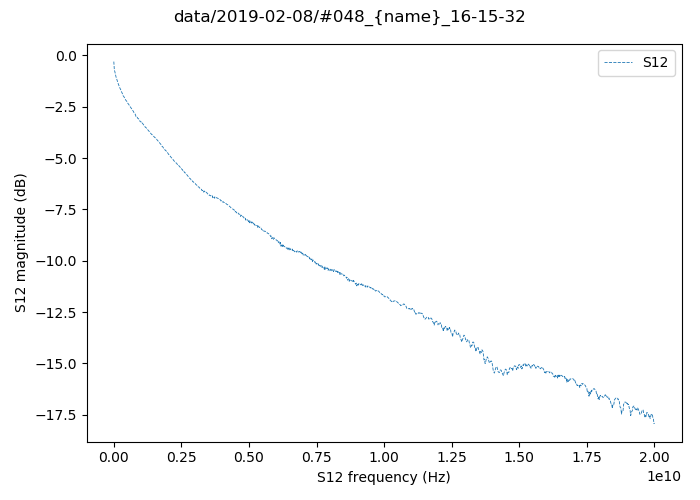

In [60]:
#line 4
vna.rf_on()
vna.channels.S21.npts(1000)
vna.channels.S12.npts(1000)
vna.channels.S12.power(10)
vna.channels.S21.power(-30)
#data_S21 = qc.Measure(vna.channels.S21.trace).run()
data_S12 = qc.Measure(vna.channels.S12.trace).run()
plot = qc.MatPlot(figsize=(7,5))
#plot.add(data_S21.VNA_S21_trace, subplot=1, label='S21')
plot.add(data_S12.VNA_S12_trace,fmt='--',linewidth=0.6,subplot=1, label='S12')
#plt.axhline(-56, label='line 4 target attenuation -56db att at 0ghz: %.4f dB' % data_S12.VNA_S12_trace[1])
#plt.ylim(-120,-20)
plt.legend()
plot.tight_layout()

DataSet:
   location = 'data/2019-02-08/#057_{name}_18-52-30'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Measured | VNA_S21_trace | trace        | (1000,)
acquired at 2019-02-08 18:52:32
DataSet:
   location = 'data/2019-02-08/#058_{name}_18-52-32'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Measured | VNA_S12_trace | trace        | (1000,)
acquired at 2019-02-08 18:52:34


<IPython.core.display.Javascript object>


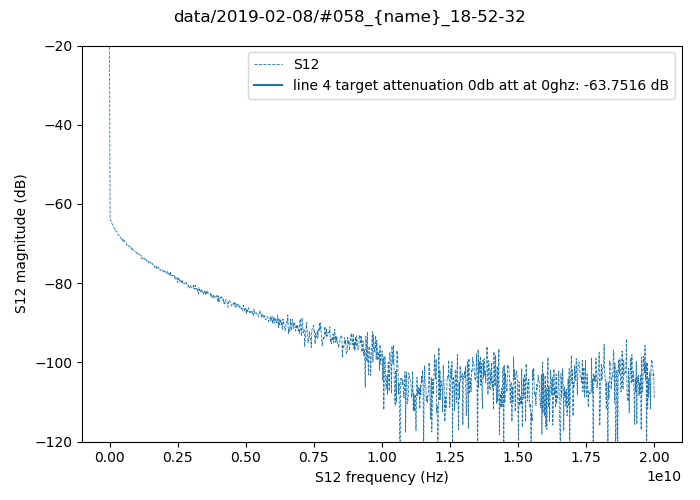

In [5]:
#line 4
vna.rf_on()
vna.channels.S21.npts(1000)
vna.channels.S12.npts(1000)
vna.channels.S12.power(0)
vna.channels.S21.power(-30)
data_S21 = qc.Measure(vna.channels.S21.trace).run()
data_S12 = qc.Measure(vna.channels.S12.trace).run()
plot = qc.MatPlot(figsize=(7,5))
#plot.add(data_S21.VNA_S21_trace, subplot=1, label='S21')
plot.add(data_S12.VNA_S12_trace,fmt='--',linewidth=0.6,subplot=1, label='S12')
plt.axhline(0, label='line 4 target attenuation 0db att at 0ghz: %.4f dB' % data_S12.VNA_S12_trace[1])
plt.ylim(-120,-20)
plt.legend()
plot.tight_layout()

DataSet:
   location = 'data/2019-02-08/#054_{name}_16-42-17'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Measured | VNA_S12_trace | trace        | (1000,)
acquired at 2019-02-08 16:42:20


<IPython.core.display.Javascript object>


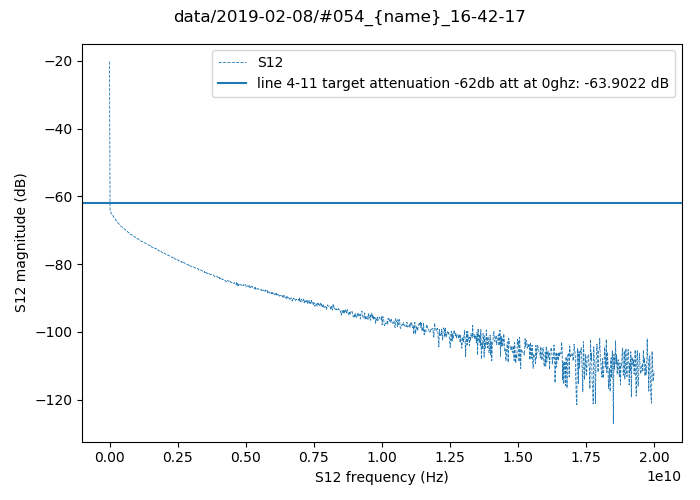

In [67]:
#line 4
vna.rf_on()
vna.channels.S21.npts(1000)
vna.channels.S12.npts(1000)
vna.channels.S12.power(10)
vna.channels.S21.power(-30)
#data_S21 = qc.Measure(vna.channels.S21.trace).run()
data_S12 = qc.Measure(vna.channels.S12.trace).run()
plot = qc.MatPlot(figsize=(7,5))
#plot.add(data_S21.VNA_S21_trace, subplot=1, label='S21')
plot.add(data_S12.VNA_S12_trace,fmt='--',linewidth=0.6,subplot=1, label='S12')
plt.axhline(-62, label='line 4-11 target attenuation -62db att at 0ghz: %.4f dB' % data_S12.VNA_S12_trace[1])
#plt.ylim(-120,-20)
plt.legend()
plot.tight_layout()

In [69]:
#line 4
vna.rf_on()
vna.channels.S21.npts(1000)
vna.channels.S12.npts(1000)
vna.channels.S12.power(10)
vna.channels.S21.power(-30)
#data_S21 = qc.Measure(vna.channels.S21.trace).run()
data_S12 = qc.Measure(vna.channels.S12.trace).run()
plot = qc.MatPlot(figsize=(7,5))
#plot.add(data_S21.VNA_S21_trace, subplot=1, label='S21')
plot.add(data_S12.VNA_S12_trace,fmt='--',linewidth=0.6,subplot=1, label='S12')
plt.axhline(-62, label='line 4-11 target attenuation -62db att at 0ghz: %.4f dB' % data_S12.VNA_S12_trace[1])
#plt.ylim(-120,-20)
plt.legend()
plot.tight_layout()

RuntimeError: ('Invalid parameter. Tried to measure S12 got ', 'getting VNA_S12_trace')

DataSet:
   location = 'data/2019-02-08/#059_{name}_18-54-49'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Measured | VNA_S12_trace | trace        | (1000,)
acquired at 2019-02-08 18:54:51


<IPython.core.display.Javascript object>


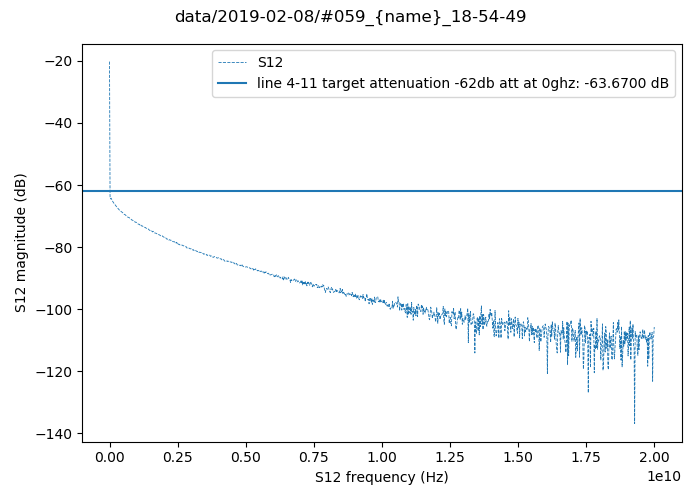

In [6]:
#line 4
vna.rf_on()
vna.channels.S21.npts(1000)
vna.channels.S12.npts(1000)
vna.channels.S12.power(10)
vna.channels.S21.power(-30)
#data_S21 = qc.Measure(vna.channels.S21.trace).run()
data_S12 = qc.Measure(vna.channels.S12.trace).run()
plot = qc.MatPlot(figsize=(7,5))
#plot.add(data_S21.VNA_S21_trace, subplot=1, label='S21')
plot.add(data_S12.VNA_S12_trace,fmt='--',linewidth=0.6,subplot=1, label='S12')
plt.axhline(-62, label='line 4-11 target attenuation -62db att at 0ghz: %.4f dB' % data_S12.VNA_S12_trace[1])
#plt.ylim(-120,-20)
plt.legend()
plot.tight_layout()

DataSet:
   location = 'data/2019-02-08/#061_{name}_19-38-58'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Measured | VNA_S12_trace | trace        | (1000,)
acquired at 2019-02-08 19:39:00


<IPython.core.display.Javascript object>


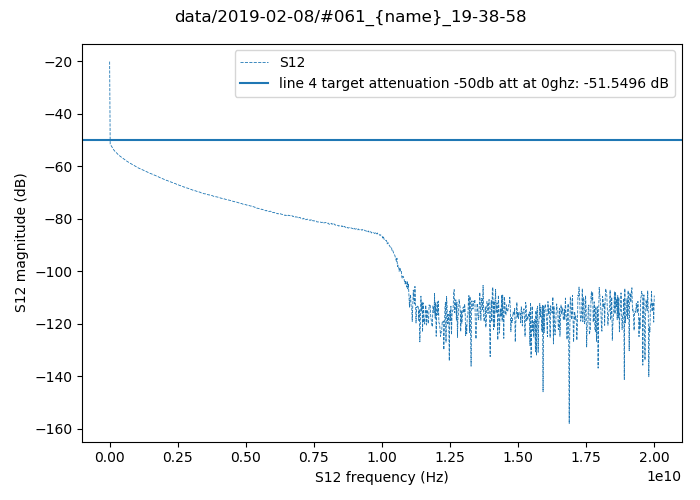

In [8]:
#line 4
vna.rf_on()
vna.channels.S21.npts(1000)
vna.channels.S12.npts(1000)
vna.channels.S12.power(10)
vna.channels.S21.power(-30)
#data_S21 = qc.Measure(vna.channels.S21.trace).run()
data_S12 = qc.Measure(vna.channels.S12.trace).run()
plot = qc.MatPlot(figsize=(7,5))
#plot.add(data_S21.VNA_S21_trace, subplot=1, label='S21')
plot.add(data_S12.VNA_S12_trace,fmt='--',linewidth=0.6,subplot=1, label='S12')
plt.axhline(-50, label='line 4 target attenuation -50db att at 0ghz: %.4f dB' % data_S12.VNA_S12_trace[1])
#plt.ylim(-120,-20)
plt.legend()
plot.tight_layout()

DataSet:
   location = 'data/2019-02-08/#063_{name}_19-42-08'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Measured | VNA_S12_trace | trace        | (1000,)
acquired at 2019-02-08 19:42:10


<IPython.core.display.Javascript object>


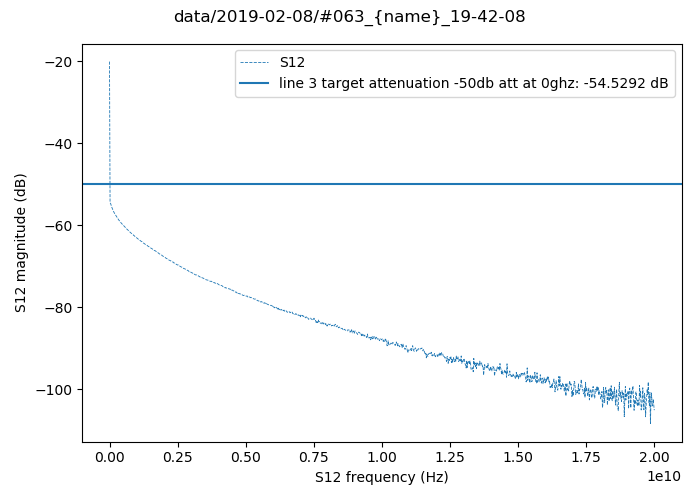

In [10]:
#line 3
vna.rf_on()
vna.channels.S21.npts(1000)
vna.channels.S12.npts(1000)
vna.channels.S12.power(10)
vna.channels.S21.power(-30)
#data_S21 = qc.Measure(vna.channels.S21.trace).run()
data_S12 = qc.Measure(vna.channels.S12.trace).run()
plot = qc.MatPlot(figsize=(7,5))
#plot.add(data_S21.VNA_S21_trace, subplot=1, label='S21')
plot.add(data_S12.VNA_S12_trace,fmt='--',linewidth=0.6,subplot=1, label='S12')
plt.axhline(-50, label='line 3 target attenuation -50db att at 0ghz: %.4f dB' % data_S12.VNA_S12_trace[1])
#plt.ylim(-120,-20)
plt.legend()
plot.tight_layout()

# 14/02/19 Last line check
We skipped the input lines 4-5, 4-11, 4-17, 4-23 so we are redoing them now.

DataSet:
   location = 'data/2019-02-14/#003_{name}_17-25-14'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Measured | VNA_S12_trace | trace        | (1000,)
acquired at 2019-02-14 17:25:15


<IPython.core.display.Javascript object>


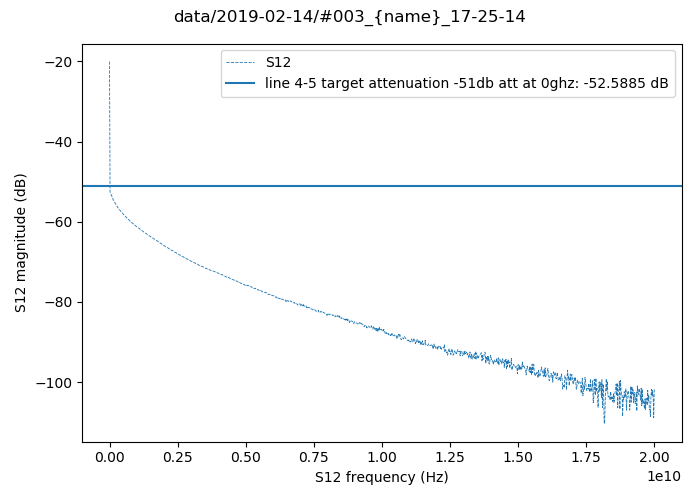

In [7]:
#line 4-5
vna.rf_on()
vna.channels.S21.npts(1000)
vna.channels.S12.npts(1000)
vna.channels.S12.power(10)
vna.channels.S21.power(-60)
#data_S21 = qc.Measure(vna.channels.S21.trace).run()
data_S12 = qc.Measure(vna.channels.S12.trace).run()
plot = qc.MatPlot(figsize=(7,5))
#plot.add(data_S21.VNA_S21_trace, subplot=1, label='S21')
plot.add(data_S12.VNA_S12_trace,fmt='--',linewidth=0.6,subplot=1, label='S12')
plt.axhline(-51, label='line 4-5 target attenuation -51db att at 0ghz: %.4f dB' % data_S12.VNA_S12_trace[1])
#plt.ylim(-120,-20)
plt.legend()
plot.tight_layout()

DataSet:
   location = 'data/2019-02-14/#005_{name}_17-29-14'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Measured | VNA_S12_trace | trace        | (1000,)
acquired at 2019-02-14 17:29:16


<IPython.core.display.Javascript object>


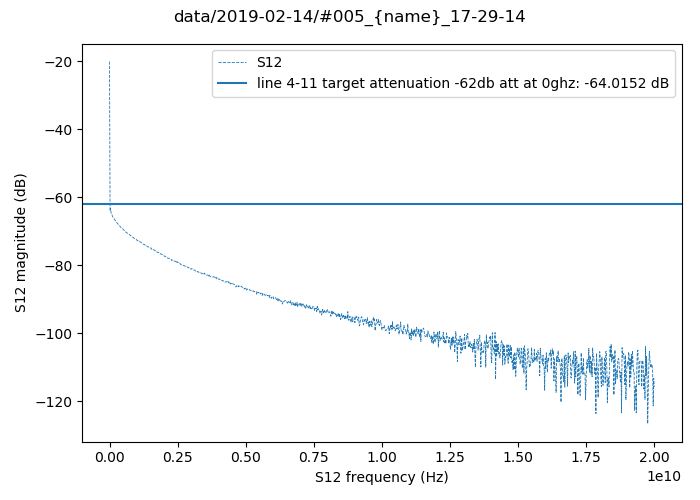

In [9]:
#line 4-11
vna.rf_on()
vna.channels.S21.npts(1000)
vna.channels.S12.npts(1000)
vna.channels.S12.power(10)
vna.channels.S21.power(-60)
#data_S21 = qc.Measure(vna.channels.S21.trace).run()
data_S12 = qc.Measure(vna.channels.S12.trace).run()
plot = qc.MatPlot(figsize=(7,5))
#plot.add(data_S21.VNA_S21_trace, subplot=1, label='S21')
plot.add(data_S12.VNA_S12_trace,fmt='--',linewidth=0.6,subplot=1, label='S12')
plt.axhline(-62, label='line 4-11 target attenuation -62db att at 0ghz: %.4f dB' % data_S12.VNA_S12_trace[1])
#plt.ylim(-120,-20)
plt.legend()
plot.tight_layout()

DataSet:
   location = 'data/2019-02-14/#006_{name}_17-34-58'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Measured | VNA_S12_trace | trace        | (1000,)
acquired at 2019-02-14 17:34:59


<IPython.core.display.Javascript object>


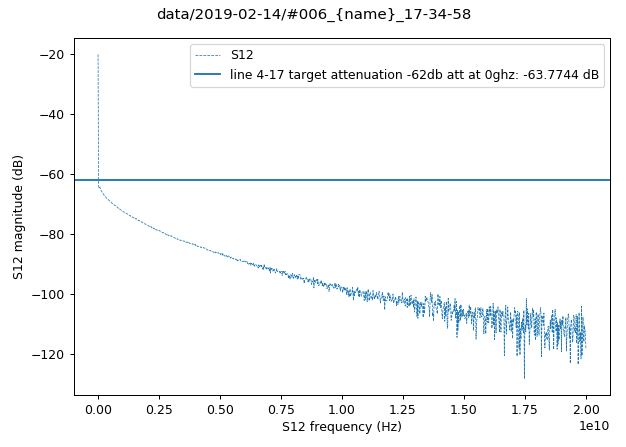

In [10]:
#line 4-11
vna.rf_on()
vna.channels.S21.npts(1000)
vna.channels.S12.npts(1000)
vna.channels.S12.power(10)
vna.channels.S21.power(-60)
#data_S21 = qc.Measure(vna.channels.S21.trace).run()
data_S12 = qc.Measure(vna.channels.S12.trace).run()
plot = qc.MatPlot(figsize=(7,5))
#plot.add(data_S21.VNA_S21_trace, subplot=1, label='S21')
plot.add(data_S12.VNA_S12_trace,fmt='--',linewidth=0.6,subplot=1, label='S12')
plt.axhline(-62, label='line 4-17 target attenuation -62db att at 0ghz: %.4f dB' % data_S12.VNA_S12_trace[1])
#plt.ylim(-120,-20)
plt.legend()
plot.tight_layout()

DataSet:
   location = 'data/2019-02-14/#007_{name}_17-37-46'
   <Type>   | <array_id>    | <array.name> | <array.shape>
   Measured | VNA_S12_trace | trace        | (1000,)
acquired at 2019-02-14 17:37:48


<IPython.core.display.Javascript object>


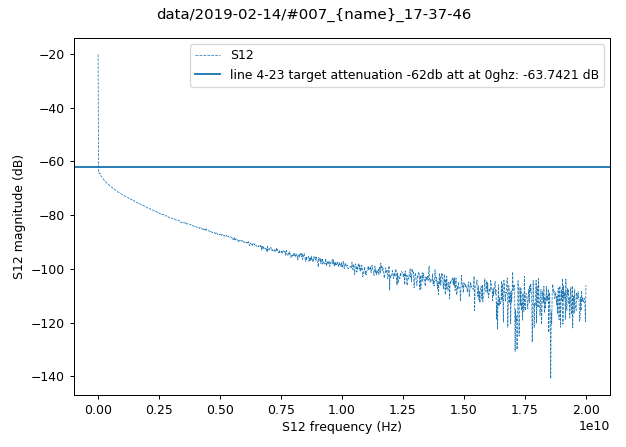

In [11]:
#line 4-11
vna.rf_on()
vna.channels.S21.npts(1000)
vna.channels.S12.npts(1000)
vna.channels.S12.power(10)
vna.channels.S21.power(-60)
#data_S21 = qc.Measure(vna.channels.S21.trace).run()
data_S12 = qc.Measure(vna.channels.S12.trace).run()
plot = qc.MatPlot(figsize=(7,5))
#plot.add(data_S21.VNA_S21_trace, subplot=1, label='S21')
plot.add(data_S12.VNA_S12_trace,fmt='--',linewidth=0.6,subplot=1, label='S12')
plt.axhline(-62, label='line 4-23 target attenuation -62db att at 0ghz: %.4f dB' % data_S12.VNA_S12_trace[1])
#plt.ylim(-120,-20)
plt.legend()
plot.tight_layout()